In [1]:
from datascience import *
import numpy as np

%matplotlib inline
import matplotlib.pyplot as plots
plots.style.use('fivethirtyeight')

## Comparison ##

In [2]:
3 > 1

True

In [3]:
type(3 > 1)

bool

In [4]:
True

True

In [5]:
#true #needs to be capital T

In [6]:
#3 = 3 #can't assign to 3

In [7]:
3 == 3.0 #implicit cast

True

In [8]:
10 != 2

True

In [9]:
x = 14 #works with variables
y = 3

In [10]:
x > 15

False

In [11]:
12 < x

True

In [12]:
x < 20

True

In [13]:
12 < x < 20 #You can chain comparisons

True

In [14]:
10 < x-y < 13

True

In [15]:
x > 13 and y < 3.14159 #and or not

True

## Comparisons with arrays

In [16]:
pets = make_array('cat', 'cat', 'dog', 'cat', 'dog', 'rabbit')

In [17]:
pets == 'cat'

array([ True,  True, False,  True, False, False], dtype=bool)

In [18]:
1 + 1 + 0 + 1 + 0 + 0

3

In [19]:
sum(make_array(True, True, False, True, False, False))

3

In [20]:
sum(pets == 'dog')

2

In [44]:
np.count_nonzero(pets == 'dog')

2

In [45]:
x = np.arange(20, 31)

In [46]:
x > 28

array([False, False, False, False, False, False, False, False, False,
        True,  True], dtype=bool)

## Simulation

Let's play a game: we each roll a die. 

If my number is bigger: you pay me a dollar.

If they're the same: we do nothing.

If your number is bigger: I pay you a dollar.

Steps:
1. Find a way to simulate two dice rolls.
2. Compute how much money we win/lose based on the result.
3. Do steps 1 and 2 10,000 times.

### Conditional Statements

In [47]:
# Work in progress
def one_round(my_roll, your_roll):
    if my_roll > your_roll:
        return 1

In [48]:
one_round(4, 3)

1

In [49]:
one_round(2, 6)

In [50]:
# Final correct version
def one_round(my_roll, your_roll):
    if my_roll > your_roll:
        return 1
    elif your_roll > my_roll:
        return -1
    elif your_roll == my_roll:
        return 0

In [51]:
one_round(1, 1)

0

In [52]:
one_round(6, 5)

1

In [53]:
one_round(7, -1)

1

### Random Selection

In [54]:
mornings = make_array('wake up', 'sleep in')

In [55]:
np.random.choice(mornings)

'wake up'

In [56]:
np.random.choice(mornings)

'sleep in'

In [57]:
np.random.choice(mornings)

'sleep in'

In [58]:
np.random.choice(mornings, 7)

array(['sleep in', 'sleep in', 'wake up', 'wake up', 'wake up', 'wake up',
       'wake up'],
      dtype='<U8')

In [59]:
sum(np.random.choice(mornings, 7) == 'wake up') #Bad, this and next cell are two different weeks

4

In [60]:
sum(np.random.choice(mornings, 7) == 'sleep in')

4

In [61]:
morning_week = np.random.choice(mornings, 7) #instead save and then sum
morning_week

array(['wake up', 'wake up', 'wake up', 'sleep in', 'sleep in', 'wake up',
       'sleep in'],
      dtype='<U8')

In [62]:
sum(morning_week == 'wake up')

4

In [63]:
sum(morning_week == 'sleep in') #now it totals to 7

3

In [64]:
die_faces = np.arange(1, 7) #https://www.google.com/search?q=dice+pictures

In [65]:
np.random.choice(die_faces)

2

In [66]:
def simulate_one_round():
    my_roll = np.random.choice(die_faces)
    your_roll = np.random.choice(die_faces)
    return one_round(my_roll, your_roll)

In [67]:
simulate_one_round()

-1

### Appending Arrays

In [68]:
first = np.arange(4)
second = np.arange(10, 17)

In [69]:
np.append(first, 6)

array([0, 1, 2, 3, 6])

In [70]:
first

array([0, 1, 2, 3])

In [71]:
np.append(first, second)

array([ 0,  1,  2,  3, 10, 11, 12, 13, 14, 15, 16])

In [72]:
first #doesn't change first without assignment

array([0, 1, 2, 3])

In [73]:
second

array([10, 11, 12, 13, 14, 15, 16])

### Repeated Betting ###

In [74]:
results = make_array()

In [75]:
results = np.append(results, simulate_one_round())
results

array([-1.])

## `For` Statements

In [76]:
for pet in make_array('cat', 'dog', 'rabbit'):
    print('I love my ' + pet)

I love my cat
I love my dog
I love my rabbit


In [77]:
pet = make_array('cat', 'dog', 'rabbit').item(0)
print('I love my ' + pet)

pet = make_array('cat', 'dog', 'rabbit').item(1)
print('I love my ' + pet)

pet = make_array('cat', 'dog', 'rabbit').item(2)
print('I love my ' + pet)

I love my cat
I love my dog
I love my rabbit


In [78]:
game_outcomes = make_array()

for i in np.arange(5):
    game_outcomes = np.append(game_outcomes, simulate_one_round())
    
game_outcomes

array([ 1.,  1., -1., -1.,  1.])

In [79]:
game_outcomes = make_array()

for i in np.arange(10000):
    game_outcomes = np.append(game_outcomes, simulate_one_round())
    
game_outcomes

array([-1.,  1.,  0., ..., -1.,  0.,  1.])

In [80]:
len(game_outcomes)

10000

In [81]:
results = Table().with_column('My winnings', game_outcomes)

In [82]:
results

My winnings
-1
1
0
-1
-1
1
0
1
0
1


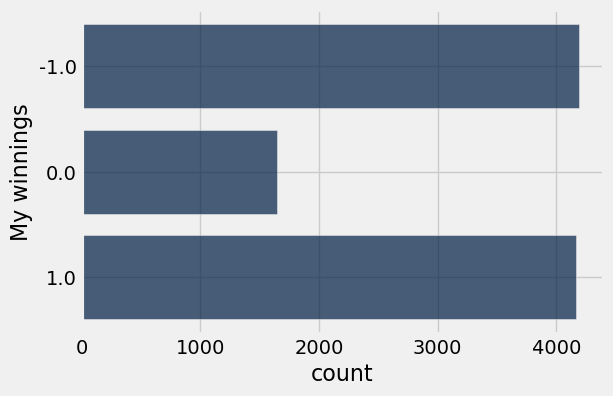

In [83]:
results.group('My winnings').barh('My winnings')

In [84]:
results.group('My winnings')

My winnings,count
-1,4189
0,1645
1,4166


In [85]:
# Bonus question: This simulation is relatively simple. 
# Can you find a way to run it without using a for loop?

### Another example: simulating heads in 100 coin tosses

In [86]:
coin = make_array('heads', 'tails')

In [87]:
sum(np.random.choice(coin, 100) == 'heads')

44

In [88]:
# Simulate one outcome

def num_heads():
    return sum(np.random.choice(coin, 100) == 'heads')

In [89]:
# Decide how many times you want to repeat the experiment

repetitions = 10000

In [90]:
# Simulate that many outcomes

outcomes = make_array()

for i in np.arange(repetitions):
    outcomes = np.append(outcomes, num_heads())

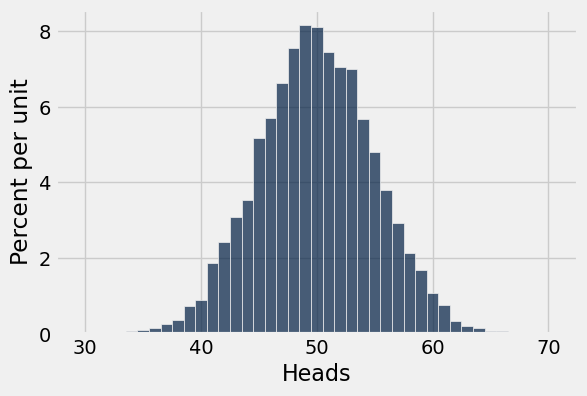

In [91]:
heads = Table().with_column('Heads', outcomes)
heads.hist(bins = np.arange(29.5, 70.6))

### Optional: Bay Area Bike Share

In [92]:
trip = Table.read_table('trip.csv')
trip

Trip ID,Duration,Start Date,Start Station,Start Terminal,End Date,End Station,End Terminal,Bike #,Subscriber Type,Zip Code
913460,765,8/31/2015 23:26,Harry Bridges Plaza (Ferry Building),50,8/31/2015 23:39,San Francisco Caltrain (Townsend at 4th),70,288,Subscriber,2139
913459,1036,8/31/2015 23:11,San Antonio Shopping Center,31,8/31/2015 23:28,Mountain View City Hall,27,35,Subscriber,95032
913455,307,8/31/2015 23:13,Post at Kearny,47,8/31/2015 23:18,2nd at South Park,64,468,Subscriber,94107
913454,409,8/31/2015 23:10,San Jose City Hall,10,8/31/2015 23:17,San Salvador at 1st,8,68,Subscriber,95113
913453,789,8/31/2015 23:09,Embarcadero at Folsom,51,8/31/2015 23:22,Embarcadero at Sansome,60,487,Customer,9069
913452,293,8/31/2015 23:07,Yerba Buena Center of the Arts (3rd @ Howard),68,8/31/2015 23:12,San Francisco Caltrain (Townsend at 4th),70,538,Subscriber,94118
913451,896,8/31/2015 23:07,Embarcadero at Folsom,51,8/31/2015 23:22,Embarcadero at Sansome,60,363,Customer,92562
913450,255,8/31/2015 22:16,Embarcadero at Sansome,60,8/31/2015 22:20,Steuart at Market,74,470,Subscriber,94111
913449,126,8/31/2015 22:12,Beale at Market,56,8/31/2015 22:15,Temporary Transbay Terminal (Howard at Beale),55,439,Subscriber,94130
913448,932,8/31/2015 21:57,Post at Kearny,47,8/31/2015 22:12,South Van Ness at Market,66,472,Subscriber,94702


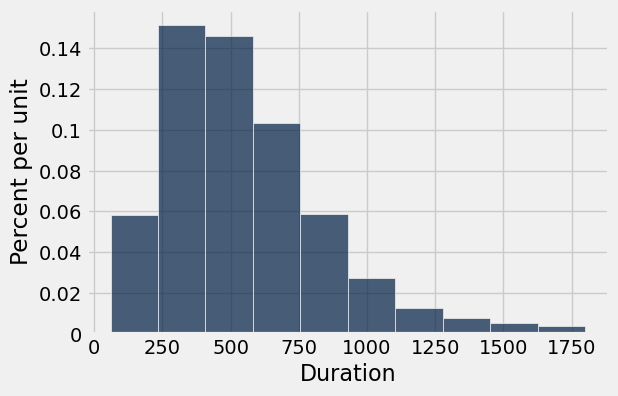

In [93]:
commute = trip.where('Duration', are.below(1800))
commute.hist('Duration')

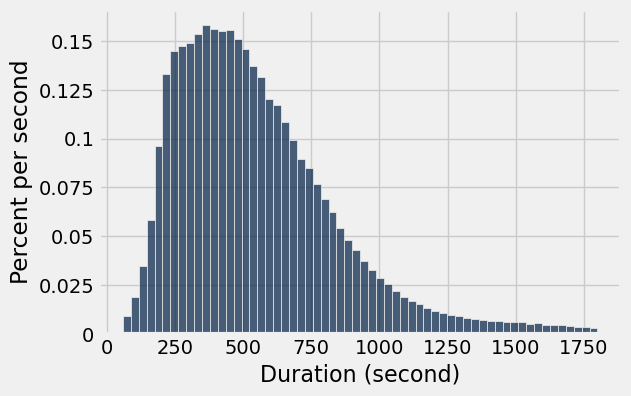

In [94]:
commute.hist('Duration', bins=60, unit='second')

In [95]:
# Percent of people who have a ride duration between 500 and 250 seconds
(500-250) * 0.15 

37.5

In [96]:
starts = commute.group('Start Station').sort('count', descending=True)
starts

Start Station,count
San Francisco Caltrain (Townsend at 4th),25858
San Francisco Caltrain 2 (330 Townsend),21523
Harry Bridges Plaza (Ferry Building),15543
Temporary Transbay Terminal (Howard at Beale),14298
2nd at Townsend,13674
Townsend at 7th,13579
Steuart at Market,13215
Embarcadero at Sansome,12842
Market at 10th,11523
Market at Sansome,11023


In [97]:
commute.pivot('Start Station', 'End Station')

End Station,2nd at Folsom,2nd at South Park,2nd at Townsend,5th at Howard,Adobe on Almaden,Arena Green / SAP Center,Beale at Market,Broadway St at Battery St,California Ave Caltrain Station,Castro Street and El Camino Real,Civic Center BART (7th at Market),Clay at Battery,Commercial at Montgomery,Cowper at University,Davis at Jackson,Embarcadero at Bryant,Embarcadero at Folsom,Embarcadero at Sansome,Embarcadero at Vallejo,Evelyn Park and Ride,Franklin at Maple,Golden Gate at Polk,Grant Avenue at Columbus Avenue,Harry Bridges Plaza (Ferry Building),Howard at 2nd,Japantown,MLK Library,Market at 10th,Market at 4th,Market at Sansome,Mechanics Plaza (Market at Battery),Mezes Park,Mountain View Caltrain Station,Mountain View City Hall,Palo Alto Caltrain Station,Park at Olive,Paseo de San Antonio,Post at Kearny,Powell Street BART,Powell at Post (Union Square),Redwood City Caltrain Station,Redwood City Medical Center,Redwood City Public Library,Rengstorff Avenue / California Street,Ryland Park,SJSU - San Salvador at 9th,SJSU 4th at San Carlos,San Antonio Caltrain Station,San Antonio Shopping Center,San Francisco Caltrain (Townsend at 4th),San Francisco Caltrain 2 (330 Townsend),San Francisco City Hall,San Jose City Hall,San Jose Civic Center,San Jose Diridon Caltrain Station,San Mateo County Center,San Pedro Square,San Salvador at 1st,Santa Clara County Civic Center,Santa Clara at Almaden,South Van Ness at Market,Spear at Folsom,St James Park,Stanford in Redwood City,Steuart at Market,Temporary Transbay Terminal (Howard at Beale),Townsend at 7th,University and Emerson,Washington at Kearny,Yerba Buena Center of the Arts (3rd @ Howard)
2nd at Folsom,54,190,554,107,0,0,40,21,0,0,44,78,54,0,9,77,32,41,14,0,0,11,30,416,53,0,0,169,114,302,33,0,0,0,0,0,0,60,121,88,0,0,0,0,0,0,0,0,0,694,445,21,0,0,0,0,0,0,0,0,38,57,0,0,39,237,342,0,17,31
2nd at South Park,295,164,71,180,0,0,208,85,0,0,112,87,160,0,37,56,178,83,116,0,0,57,73,574,500,0,0,139,199,1633,119,0,0,0,0,0,0,299,84,113,0,0,0,0,0,0,0,0,0,559,480,48,0,0,0,0,0,0,0,0,66,152,0,0,374,429,143,0,63,209
2nd at Townsend,437,151,185,92,0,0,608,350,0,0,80,329,168,0,386,361,658,506,254,0,0,27,315,2607,295,0,0,110,225,845,177,0,0,0,0,0,0,120,100,141,0,0,0,0,0,0,0,0,0,905,299,14,0,0,0,0,0,0,0,0,72,508,0,0,2349,784,417,0,57,166
5th at Howard,113,177,148,83,0,0,59,130,0,0,203,76,129,0,30,57,49,166,54,0,0,85,78,371,478,0,0,303,158,168,90,0,0,0,0,0,0,93,183,169,0,0,0,0,0,0,0,0,0,690,1859,48,0,0,0,0,0,0,0,0,116,102,0,0,182,750,200,0,43,267
Adobe on Almaden,0,0,0,0,11,4,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,17,7,0,0,0,0,0,0,0,0,0,25,0,0,0,0,0,0,0,7,7,16,0,0,0,0,0,19,23,265,0,20,4,5,10,0,0,14,0,0,0,0,0,0,0
Arena Green / SAP Center,0,0,0,0,7,64,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,16,5,0,0,0,0,0,0,0,0,0,21,0,0,0,0,0,0,0,24,3,7,0,0,0,0,0,6,20,7,0,56,12,38,259,0,0,13,0,0,0,0,0,0,0
Beale at Market,127,79,183,59,0,0,59,661,0,0,201,75,101,0,247,178,38,590,165,0,0,54,435,57,72,0,0,286,236,163,26,0,0,0,0,0,0,49,227,179,0,0,0,0,0,0,0,0,0,640,269,25,0,0,0,0,0,0,0,0,243,128,0,0,16,167,35,0,64,45
Broadway St at Battery St,67,89,279,119,0,0,1022,110,0,0,62,283,226,0,191,198,79,231,35,0,0,5,70,168,49,0,0,32,97,341,214,0,0,0,0,0,0,169,71,218,0,0,0,0,0,0,0,0,0,685,438,7,0,0,0,0,0,0,0,0,18,106,0,0,344,748,50,0,79,47
California Ave Caltrain Station,0,0,0,0,0,0,0,0,38,1,0,0,0,29,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,192,40,0,0,0,0,0,0,0,6,0,0,0,17,10,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,57,0,0
Castro Street and El Camino Real,0,0,0,0,0,0,0,0,0,30,0,0,0,0,0,0,0,0,0,14,0,0,0,0,0,0,0,0,0,0,0,0,931,34,0,0,0,0,0,0,0,0,0,7,0,0,0,4,12,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [98]:
duration = trip.select('Start Station', 'End Station', 'Duration')
duration

Start Station,End Station,Duration
Harry Bridges Plaza (Ferry Building),San Francisco Caltrain (Townsend at 4th),765
San Antonio Shopping Center,Mountain View City Hall,1036
Post at Kearny,2nd at South Park,307
San Jose City Hall,San Salvador at 1st,409
Embarcadero at Folsom,Embarcadero at Sansome,789
Yerba Buena Center of the Arts (3rd @ Howard),San Francisco Caltrain (Townsend at 4th),293
Embarcadero at Folsom,Embarcadero at Sansome,896
Embarcadero at Sansome,Steuart at Market,255
Beale at Market,Temporary Transbay Terminal (Howard at Beale),126
Post at Kearny,South Van Ness at Market,932


## Optional: Advanced `where` ##

In [99]:
#apply an array of bools to a table
ages = make_array(16, 22, 18, 15, 19, 15, 16, 21)
age = Table().with_column('Age', ages)

In [100]:
age

Age
16
22
18
15
19
15
16
21


In [101]:
age.where('Age', are.above_or_equal_to(18))

Age
22
18
19
21


In [102]:
voter = ages >= 18

In [103]:
voter

array([False,  True,  True, False,  True, False, False,  True], dtype=bool)

In [104]:
age.where(voter)

Age
22
18
19
21


In [105]:
is_voter = are.above_or_equal_to(18)

In [106]:
type(is_voter)

datascience.predicates._combinable

In [107]:
is_voter(22)

True

In [108]:
is_voter(3)

False

In [109]:
age.apply(is_voter, 'Age')

array([False,  True,  True, False,  True, False, False,  True], dtype=bool)

In [110]:
ages >= 18

array([False,  True,  True, False,  True, False, False,  True], dtype=bool)

In [111]:
voter

array([False,  True,  True, False,  True, False, False,  True], dtype=bool)

In [112]:
def my_voter_function(x):
    return x >= 18

In [113]:
age.where('Age', are.above_or_equal_to(18))

Age
22
18
19
21


In [114]:
age.where(voter)

Age
22
18
19
21


In [91]:
age.where('Age', my_voter_function)

Age
22
18
19
21
